# Visualizando datos de COVID-19, Exceso de Mortalidad y Movilidad

Actualización al 24 de marzo de 2021

In [33]:
# Dependencies
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
from scipy.stats import chisquare
#from benfordslaw import benfordslaw
from scipy.stats import chi2
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Datos COVID-19

In [2]:
# 

Covid19 = pd.read_csv('Series_Casos_05.04.2021.csv', encoding = 'utf-8-sig')

Covid19 = Covid19[['Fecha', 'Confirmados', 'Defunciones_Sint', 'Defunciones_Muer']]

Covid19.head()

,Fecha,Confirmados,Defunciones_Sint,Defunciones_Muer
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,4.0,NaN,NaN
2,2020-01-03,4.0,NaN,NaN
3,2020-01-04,1.0,NaN,NaN
4,2020-01-05,3.0,NaN,NaN


In [3]:
# Nombres de las columnas
Covid19.columns

Index(['Fecha', 'Confirmados', 'Defunciones_Sint', 'Defunciones_Muer'], dtype='object')

## Datos Mortalidad - Defunciones

In [4]:
# 

Defunciones = pd.read_csv('Series_Defunciones.csv', encoding = 'utf-8-sig')

Defunciones.head()

,Fecha,Defunciones,Defunciones_Reg
0,2020-01-01,2440.0,199
1,2020-01-02,2486.0,1476
2,2020-01-03,2234.0,1799
3,2020-01-04,2279.0,1328
4,2020-01-05,2340.0,1081


In [5]:
# Nombres de las columnas
Defunciones.columns

Index(['Fecha', 'Defunciones', 'Defunciones_Reg'], dtype='object')

## Datos Mobility

In [6]:
# 

Mobility = pd.read_csv('Series_Mobility.csv', encoding = 'utf-8-sig')

Mobility = Mobility[['Fecha', 'residential_percent_change_from_baseline', 
                     'retail_and_recreation_percent_change_from_baseline']].rename( 
    columns = {'residential_percent_change_from_baseline': 'Residential', 
               'retail_and_recreation_percent_change_from_baseline': 'Recreation'} )

Mobility.head()

,Fecha,Residential,Recreation
0,2020-02-15,-1.0,6.0
1,2020-02-16,-1.0,7.0
2,2020-02-17,-2.0,2.0
3,2020-02-18,-2.0,0.0
4,2020-02-19,-1.0,0.0


In [7]:
# Nombres de las columnas
Mobility.columns

Index(['Fecha', 'Residential', 'Recreation'], dtype='object')

## Uniendo las tablas

In [8]:
#

#Datos = pd.merge(Covid19, Defunciones, how = 'outer', on = 'Fecha')

#Datos = pd.merge(Datos, Mobility, how = 'outer', on = 'Fecha')

Datos = pd.merge(Covid19, Mobility, how = 'outer', on = 'Fecha')

Datos.head()

,Fecha,Confirmados,Defunciones_Sint,Defunciones_Muer,Residential,Recreation
0,2020-01-01,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,4.0,NaN,NaN,NaN,NaN
2,2020-01-03,4.0,NaN,NaN,NaN,NaN
3,2020-01-04,1.0,NaN,NaN,NaN,NaN
4,2020-01-05,3.0,NaN,NaN,NaN,NaN


## Correlación

In [29]:
#
DF = Datos[Datos['Fecha'] >= '2020-03-22'].dropna(how = 'any')

DF['Lag 7 Confirmados'] = DF['Confirmados'].shift(7)
DF['Lag 7 Defunciones_Sint'] = DF['Defunciones_Sint'].shift(7)
DF['Lag 7 Defunciones_Muer'] = DF['Defunciones_Muer'].shift(7)
DF['Lag 7 Residential'] = DF['Residential'].shift(7)
DF['Lag 7 Recreation'] = DF['Recreation'].shift(7)

DF['Lag 14 Confirmados'] = DF['Confirmados'].shift(14)
DF['Lag 14 Defunciones_Sint'] = DF['Defunciones_Sint'].shift(14)
DF['Lag 14 Defunciones_Muer'] = DF['Defunciones_Muer'].shift(14)
DF['Lag 14 Residential'] = DF['Residential'].shift(14)
DF['Lag 14 Recreation'] = DF['Recreation'].shift(14)

DF.head(20)

,Fecha,Confirmados,Defunciones_Sint,Defunciones_Muer,Residential,Recreation,Lag 7 Confirmados,Lag 7 Defunciones_Sint,Lag 7 Defunciones_Muer,Lag 7 Residential,Lag 7 Recreation,Lag 14 Confirmados,Lag 14 Defunciones_Sint,Lag 14 Defunciones_Muer,Lag 14 Residential,Lag 14 Recreation
81,2020-03-22,176.0,27.0,2.0,8.0,-37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2020-03-23,258.0,43.0,1.0,12.0,-31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2020-03-24,203.0,34.0,2.0,14.0,-35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2020-03-25,240.0,43.0,2.0,16.0,-37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2020-03-26,289.0,51.0,8.0,16.0,-37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2020-03-27,312.0,49.0,8.0,17.0,-39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-03-28,302.0,55.0,15.0,12.0,-40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2020-03-29,293.0,62.0,9.0,11.0,-45.0,176.0,27.0,2.0,8.0,-37.0,NaN,NaN,NaN,NaN,NaN
89,2020-03-30,420.0,75.0,12.0,15.0,-35.0,258.0,43.0,1.0,12.0,-31.0,NaN,NaN,NaN,NaN,NaN
90,2020-03-31,327.0,69.0,22.0,16.0,-35.0,203.0,34.0,2.0,14.0,-35.0,NaN,NaN,NaN,NaN,NaN


In [31]:
#
Corr = DF.corr()

Corr

,Confirmados,Defunciones_Sint,Defunciones_Muer,Residential,Recreation,Lag 7 Confirmados,Lag 7 Defunciones_Sint,Lag 7 Defunciones_Muer,Lag 7 Residential,Lag 7 Recreation,Lag 14 Confirmados,Lag 14 Defunciones_Sint,Lag 14 Defunciones_Muer,Lag 14 Residential,Lag 14 Recreation
Confirmados,1.000000,0.882125,0.829211,-0.226483,0.348175,0.901350,0.820140,0.722859,-0.203640,0.352984,0.808040,0.756377,0.593854,-0.206913,0.397721
Defunciones_Sint,0.882125,1.000000,0.815749,0.065043,-0.020662,0.737206,0.861570,0.656868,0.090549,-0.025566,0.615010,0.752657,0.469839,0.091803,0.018313
Defunciones_Muer,0.829211,0.815749,1.000000,-0.147756,0.148977,0.872793,0.910836,0.952826,-0.094760,0.116111,0.857834,0.935274,0.842815,-0.053082,0.100538
Residential,-0.226483,0.065043,-0.147756,1.000000,-0.668101,-0.289560,-0.014805,-0.241053,0.920386,-0.586701,-0.327360,-0.091908,-0.317207,0.879448,-0.518176
Recreation,0.348175,-0.020662,0.148977,-0.668101,1.000000,0.401473,0.043439,0.246073,-0.597836,0.876862,0.434609,0.124704,0.328629,-0.554685,0.798028
Lag 7 Confirmados,0.901350,0.737206,0.872793,-0.289560,0.401473,1.000000,0.878800,0.823396,-0.261242,0.397917,0.902143,0.812763,0.715892,-0.240173,0.396206
Lag 7 Defunciones_Sint,0.820140,0.861570,0.910836,-0.014805,0.043439,0.878800,1.000000,0.809462,0.029448,0.027073,0.737484,0.853234,0.648194,0.053658,0.015713
Lag 7 Defunciones_Muer,0.722859,0.656868,0.952826,-0.241053,0.246073,0.823396,0.809462,1.000000,-0.178902,0.190498,0.873163,0.907755,0.952846,-0.127284,0.152050
Lag 7 Residential,-0.203640,0.090549,-0.094760,0.920386,-0.597836,-0.261242,0.029448,-0.178902,1.000000,-0.659595,-0.313934,-0.052157,-0.270003,0.922596,-0.581913
Lag 7 Recreation,0.352984,-0.025566,0.116111,-0.586701,0.876862,0.397917,0.027073,0.190498,-0.659595,1.000000,0.435377,0.092240,0.282275,-0.591999,0.877780


[Text(0.5, 0, 'Confirmados'),
 Text(1.5, 0, 'Defunciones_Sint'),
 Text(2.5, 0, 'Defunciones_Muer'),
 Text(3.5, 0, 'Residential'),
 Text(4.5, 0, 'Recreation'),
 Text(5.5, 0, 'Lag 7 Confirmados'),
 Text(6.5, 0, 'Lag 7 Defunciones_Sint'),
 Text(7.5, 0, 'Lag 7 Defunciones_Muer'),
 Text(8.5, 0, 'Lag 7 Residential'),
 Text(9.5, 0, 'Lag 7 Recreation'),
 Text(10.5, 0, 'Lag 14 Confirmados'),
 Text(11.5, 0, 'Lag 14 Defunciones_Sint'),
 Text(12.5, 0, 'Lag 14 Defunciones_Muer'),
 Text(13.5, 0, 'Lag 14 Residential'),
 Text(14.5, 0, 'Lag 14 Recreation')]

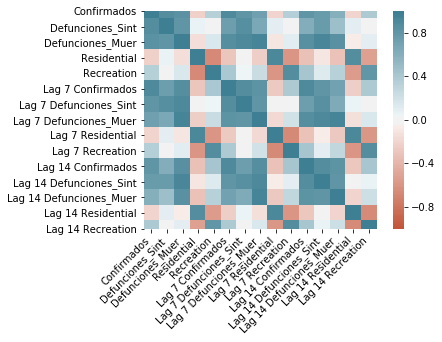

In [34]:
#
ax = sns.heatmap(
    Corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment='right')

## Pruebas de Raíces Unitarias -- ADF

In [66]:
# Seleccionamos columnas sin NaN's y en una fecha posterior al los últimos días de marzo:

DF = Datos[(Datos['Fecha'] > '2020-03-20')].dropna()

# Calculamos valores en logaritmos

DF['LConfirmados'] = np.log(DF['Confirmados'])

DF['LDefunciones_Sint'] = np.log(DF['Defunciones_Sint'])

DF['LDefunciones_Muer'] = np.log(DF['Defunciones_Muer'])

#DF['LDefunciones'] = np.log(DF['Defunciones'])

#DF['LResidential'] = np.log(DF['Residential'])

#DF['LRecreation'] = np.log(DF['Recreation'])

# Calculamos valores en diferencias logaritmicas

DF['DLConfirmados'] = DF['LConfirmados'].diff(7)

DF['DLDefunciones_Sint'] = DF['LDefunciones_Sint'].diff(7)

DF['DLDefunciones_Muer'] = DF['LDefunciones_Muer'].diff(7)

#DF['DLDefunciones'] = DF['LDefunciones'].diff(7)

DF['DResidential'] = DF['Residential'].diff(7)

DF['DRecreation'] = DF['Recreation'].diff(7)

DF = DF.dropna()

DF.head()

,Fecha,Confirmados,Defunciones_Sint,Defunciones_Muer,Residential,Recreation,LConfirmados,LDefunciones_Sint,LDefunciones_Muer,DLConfirmados,DLDefunciones_Sint,DLDefunciones_Muer,DResidential,DRecreation
88,2020-03-29,290.0,62.0,9.0,11.0,-45.0,5.669881,4.127134,2.197225,0.516589,0.831298,1.504077,3.0,-8.0
89,2020-03-30,418.0,75.0,12.0,15.0,-35.0,6.035481,4.317488,2.484907,0.502092,0.556288,2.484907,3.0,-4.0
90,2020-03-31,325.0,69.0,22.0,16.0,-35.0,5.783825,4.234107,3.091042,0.480520,0.707746,2.397895,2.0,0.0
91,2020-04-01,513.0,102.0,20.0,18.0,-37.0,6.240276,4.624973,2.995732,0.776444,0.863773,2.302585,2.0,0.0
92,2020-04-02,469.0,102.0,27.0,19.0,-47.0,6.150603,4.624973,3.295837,0.498114,0.693147,1.216395,3.0,-10.0


In [71]:
# Confirmados

result = adfuller(DF['DLConfirmados'], 
                  regression = 'c', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.208874
p-value: 0.937456
Use lags: 17
Obs.: 340
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


In [72]:
# Defunciones_Sint

result = adfuller(DF['DLDefunciones_Sint'], 
                  regression = 'c', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.181258
p-value: 0.998867
Use lags: 14
Obs.: 343
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


In [73]:
# Defunciones_Muer

result = adfuller(DF['DLDefunciones_Muer'], 
                  regression = 'ct', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.395547
p-value: 0.051986
Use lags: 17
Obs.: 340
Critical Values:
	1%: -3.986
	5%: -3.423
	10%: -3.135


In [75]:
# Residential

result = adfuller(DF['DResidential'], 
                  regression = 'ct', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.051597
p-value: 0.000002
Use lags: 14
Obs.: 343
Critical Values:
	1%: -3.985
	5%: -3.423
	10%: -3.135


## Granger causality

In [57]:
Data = DF[['DLConfirmados', 'DLResidential']] 

grangercausalitytests(Data, [15], addconst = True, verbose = True)


Granger Causality
number of lags (no zero) 15
ssr based F test:         F=0.8905  , p=0.5755  , df_denom=234, df_num=15
ssr based chi2 test:   chi2=15.1266 , p=0.4423  , df=15
likelihood ratio test: chi2=14.7106 , p=0.4725  , df=15
parameter F test:         F=0.8905  , p=0.5755  , df_denom=234, df_num=15


{15: ({'ssr_ftest': (0.8904713880913613, 0.5755307844822487, 234.0, 15),
   'ssr_chi2test': (15.126597297705816, 0.44233719698993224, 15),
   'lrtest': (14.710629175040367, 0.4724549815034105, 15),
   'params_ftest': (0.8904713880913618, 0.5755307844822487, 234.0, 15.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [20]:
# Seleccionamos columnas sin NaN's y en una fecha posterior al los últimos días de marzo:

DF_MA = Datos[(Datos['Fecha'] > '2020-03-20')].dropna()

# Calculamos valores en logaritmos

DF_MA['LConfirmados'] = np.log(DF_MA['Confirmados'].rolling(window = 7).mean())

DF_MA['LDefunciones_Sint'] = np.log(DF_MA['Defunciones_Sint'].rolling(window = 7).mean())

DF_MA['LDefunciones_Muer'] = np.log(DF_MA['Defunciones_Muer'].rolling(window = 7).mean())

DF_MA['LDefunciones'] = np.log(DF_MA['Defunciones'].rolling(window = 7).mean())

DF_MA['LResidential'] = np.log(DF_MA['Residential'].rolling(window = 7).mean())

# Calculamos valores en diferencias logaritmicas

DF_MA['DLConfirmados'] = DF_MA['LConfirmados'].diff(1)

DF_MA['DLDefunciones_Sint'] = DF_MA['LDefunciones_Sint'].diff(1)

DF_MA['DLDefunciones_Muer'] = DF_MA['LDefunciones_Muer'].diff(1)

DF_MA['DLDefunciones'] = DF_MA['LDefunciones'].diff(1)

DF_MA['DLResidential'] = DF_MA['LResidential'].diff(1)

DF_MA = DF_MA.dropna()

DF_MA.head()

,Fecha,Confirmados,Defunciones_Sint,Defunciones_Muer,Defunciones,Defunciones_Reg,Residential,LConfirmados,LDefunciones_Sint,LDefunciones_Muer,LDefunciones,LResidential,DLConfirmados,DLDefunciones_Sint,DLDefunciones_Muer,DLDefunciones,DLResidential
88,2020-03-29,290.0,62.0,9.0,1954.0,1029.0,11.0,5.588853,3.874173,1.860752,7.571621,2.639057,0.064539,0.109656,0.169076,0.004940,0.031091
89,2020-03-30,418.0,75.0,12.0,1983.0,2358.0,15.0,5.673323,3.964886,2.079442,7.573531,2.669210,0.084471,0.090714,0.218689,0.001911,0.030153
90,2020-03-31,325.0,69.0,22.0,1874.0,1970.0,16.0,5.732416,4.055505,2.384823,7.570149,2.688819,0.059093,0.090618,0.305382,-0.003383,0.019608
91,2020-04-01,513.0,102.0,20.0,1956.0,2005.0,18.0,5.853023,4.191817,2.597385,7.574192,2.708050,0.120607,0.136312,0.212561,0.004043,0.019231
92,2020-04-02,469.0,102.0,27.0,1901.0,1889.0,19.0,5.925783,4.296313,2.781478,7.566755,2.736221,0.072759,0.104496,0.184093,-0.007437,0.028171


In [29]:
# Confirmados

result = adfuller(DF_MA['DLConfirmados'], 
                  regression = 'c', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.304511
p-value: 0.014678
Use lags: 16
Obs.: 263
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


In [34]:
# Defunciones_Sint

result = adfuller(DF_MA['DLDefunciones_Sint'], 
                  regression = 'c', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.594402
p-value: 0.005869
Use lags: 16
Obs.: 263
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


In [32]:
# Defunciones_Muer

result = adfuller(DF_MA['DLDefunciones_Muer'], 
                  regression = 'ct', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.115034
p-value: 0.005994
Use lags: 16
Obs.: 263
Critical Values:
	1%: -3.994
	5%: -3.427
	10%: -3.137


In [38]:
# Defunciones

result = adfuller(DF_MA['DLDefunciones'], 
                  regression = 'ct', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.692488
p-value: 0.754157
Use lags: 14
Obs.: 265
Critical Values:
	1%: -3.993
	5%: -3.427
	10%: -3.137


In [41]:
# Residential

result = adfuller(DF_MA['DLResidential'], 
                  regression = 'ct', # “c” : constant only; “ct” : constant and trend; “nc” : no constant, no trend
                  autolag='AIC',)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Use lags: %i' % result[2])
print('Obs.: %i' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.194162
p-value: 0.000000
Use lags: 6
Obs.: 273
Critical Values:
	1%: -3.992
	5%: -3.427
	10%: -3.137
